Create and plot a 2D histogram containing a 2D gaussian distribution, with x and y being uncorrelated. What is the difference when you use the same random seed compared to different ones?

In [1]:
double gaus2D(double *x, double *par)
{
    double r1 = (double)(x[0]-par[1])/par[2];
    double r2 = (double)(x[1]-par[3])/par[4];
    double corr = (double)(par[5]*x[0]*x[1]/(par[2]*par[4]));
    return par[0]*TMath::Exp(-(r1*r1+r2*r2-corr));
}

In [2]:
// Defining some variables for convenience
auto nxbins = 100, nybins = 100;
auto xmin = -3., xmax = 3., ymin = -3., ymax = 3.;
auto scale = 1., mean1 = 0., sigma1 = 1., mean2 = 0., sigma2 = 1., correlation = 0.;

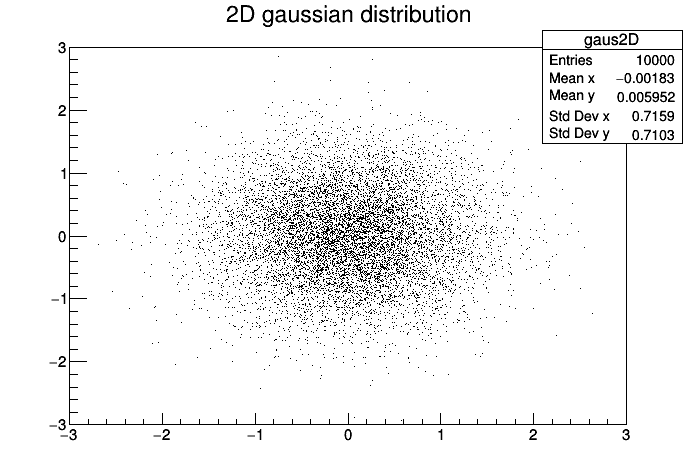

In [3]:
TF2 f1("f1",gaus2D,-3.,3.,-3.,3.,6);
f1.SetParameters(scale,mean1,sigma1,mean2,sigma2,correlation);
TH2F hgaus2D("gaus2D","2D gaussian distribution",nxbins,xmin,xmax,nybins,ymin,ymax);
hgaus2D.FillRandom("f1",10000);
TCanvas can;
hgaus2D.Draw();
can.Draw();

Create and plot a 2D histogram where x and y are correlated with some correlation coefficient.

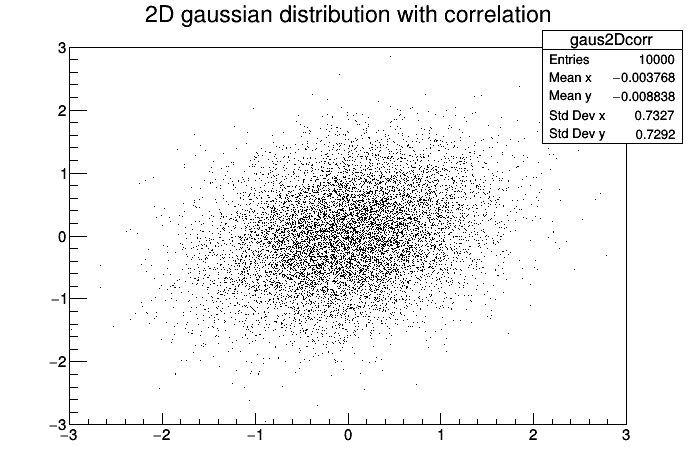

In [4]:
TH2F hgaus2Dcorr("gaus2Dcorr","2D gaussian distribution with correlation",nxbins,xmin,xmax,nybins,ymin,ymax);
correlation = 0.5;
f1.SetParameters(scale,mean1,sigma1,mean2,sigma2,correlation);
hgaus2Dcorr.FillRandom("f1",10000);
hgaus2Dcorr.Draw();
can.Draw();

Name the x-axis "Height (cm)" and the y-axis "Weight (grams)". Plot again.

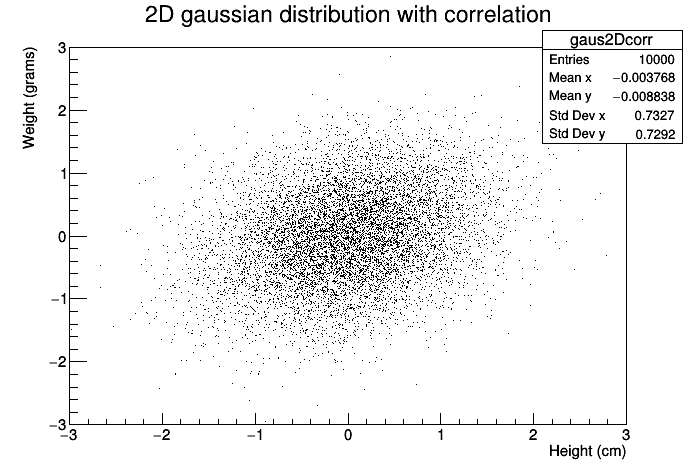

In [5]:
hgaus2Dcorr.GetXaxis()->SetTitle("Height (cm)");
hgaus2Dcorr.GetYaxis()->SetTitle("Weight (grams)");
hgaus2Dcorr.Draw();
can.Draw();

Draw the 2d histogram with the "surf" option.

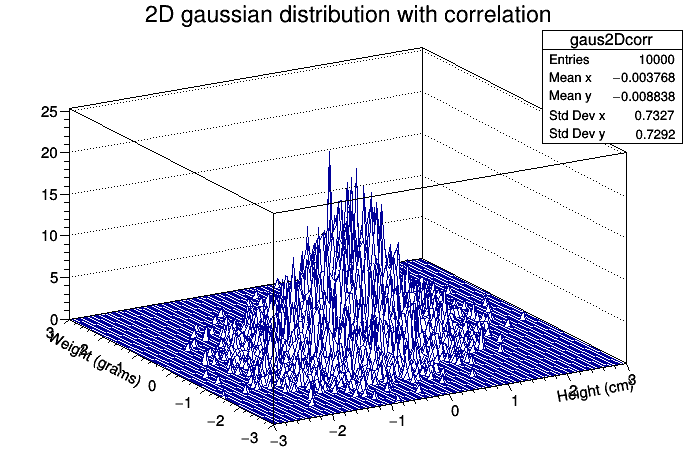

In [6]:
hgaus2Dcorr.Draw("surf");
can.Draw();

Draw a projection of the 2D histogram on the x-axis. Make a projection on the y-axis.

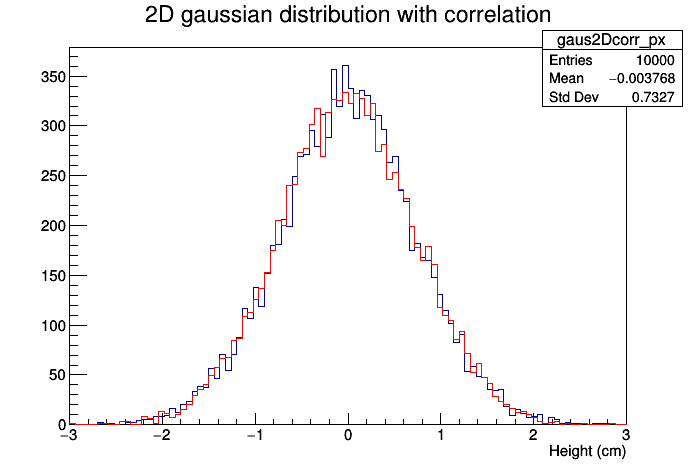

In [7]:
TH1D *hprojx = hgaus2Dcorr.ProjectionX();
TH1D *hprojy = hgaus2Dcorr.ProjectionY();
hprojx->Draw();
hprojy->SetLineColor(kRed);
hprojy->Draw("same");
can.Draw();

Make a new histogram with an exponential distribution with tau = 2. Display the statistical uncertainties in each bin.

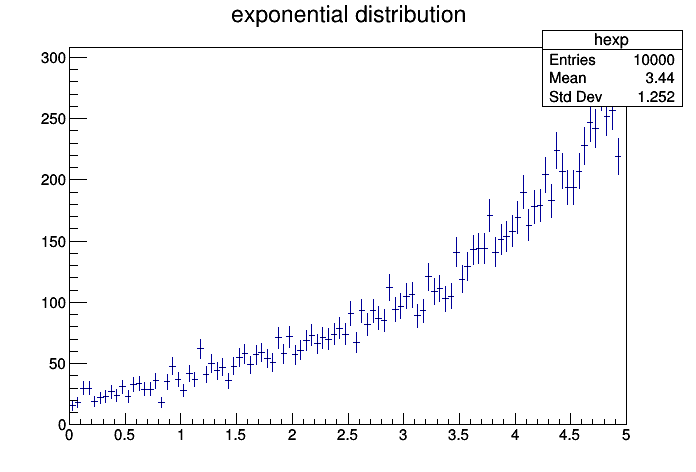

In [8]:
auto tau = 2.;
auto lambda = 1./tau;
TF1 exponential("exponential","expo",0.,5.);
exponential.SetParameters(0.,lambda);
TH1F hexp("hexp","exponential distribution",100,0.,5.);
hexp.FillRandom("exponential",10000);
hexp.Draw("e");
can.Draw();

Plot it with the y-axis on logscale.

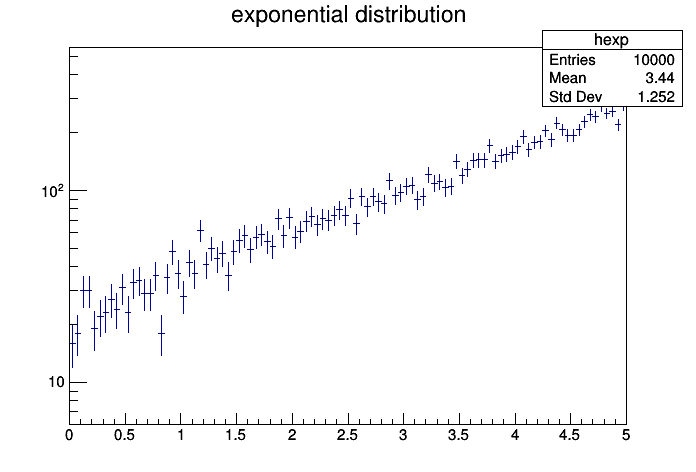

In [9]:
can.SetLogy();
hexp.Draw("e");
can.Draw();

Fit an exponential to the distribution. Do you get back the tau you put in?

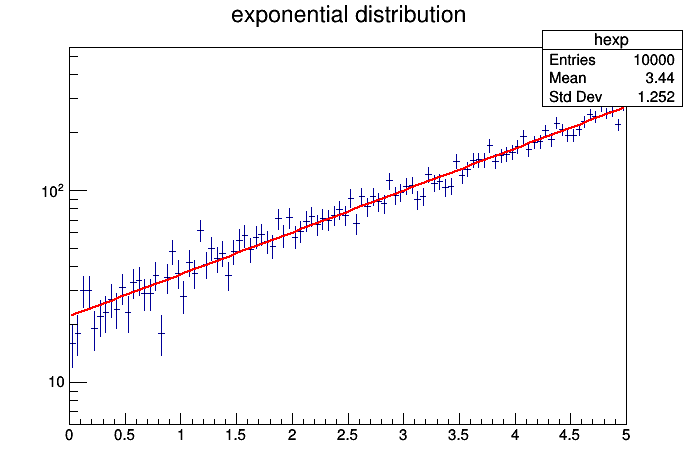

 FCN=110.99 FROM MIGRAD    STATUS=CONVERGED      52 CALLS          53 TOTAL
                     EDM=1.85259e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.08630e+00   2.93309e-02   5.19608e-05   5.95624e-04
   2  Slope        5.02805e-01   7.98190e-03   1.41389e-05   1.92016e-03


In [10]:
hexp.Fit("expo");
hexp.Draw("e");
can.Draw();

Label the x-axis "Life-time (ns)".

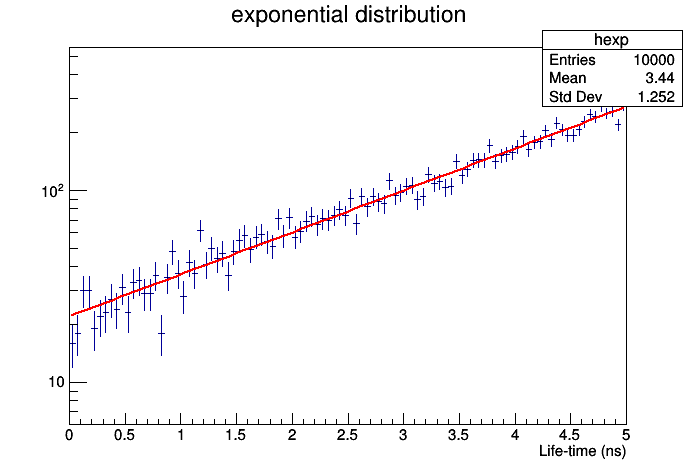

In [11]:
hexp.GetXaxis()->SetTitle("Life-time (ns)");
hexp.Draw("e");
can.Draw();